In [5]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
import os
import matplotlib.pyplot as plt

In [10]:
from google.colab import auth
auth.authenticate_user()


In [ ]:
# Autenticazione “di servizio” fornita da Colab
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

folder_id = '1gtE_lNw4MYiarzIu4qVAo-uu6aSzxS1d'
os.makedirs('/content/ndpi_files', exist_ok=True)

# Elenca e scarica tutti i file nella cartella
file_list = drive.ListFile(
    {'q': f"'{folder_id}' in parents and trashed=false"}
).GetList()

# 1) Definisci gli array
B = [
    "M-1.ndpi","M-104.ndpi","M-105.ndpi","M-108.ndpi",
    "M-112.ndpi","M-121.ndpi","M-24.ndpi","M-30.ndpi",
    "M-32.ndpi","M-36.ndpi"
]
E = [
    "M-10.ndpi","M-100.ndpi","M-102.ndpi","M-103.ndpi",
    "M-107.ndpi","M-109.ndpi","M-11.ndpi","M-110.ndpi",
    "M-111.ndpi","M-113.ndpi"
]
S = [
    "M-101.ndpi","M-114.ndpi","M-65.ndpi","M-86.ndpi","M-87.ndpi"
]

base_dir = '/content/ndpi_files'
for sub in ('B','E','S'):
    os.makedirs(os.path.join(base_dir, sub), exist_ok=True)

for f in file_list:
    title = f['title']
    if title in B:
        dest = os.path.join(base_dir, 'B', title)
    elif title in E:
        dest = os.path.join(base_dir, 'E', title)
    elif title in S:
        dest = os.path.join(base_dir, 'S', title)
    else:
        continue

    print(f"Scarico {title} in {os.path.dirname(dest)} …")
    f.GetContentFile(dest)

Scarico M-87.ndpi in /content/ndpi_files/S …
Scarico M-86.ndpi in /content/ndpi_files/S …
Scarico M-65.ndpi in /content/ndpi_files/S …
Scarico M-32.ndpi in /content/ndpi_files/B …
Scarico M-30.ndpi in /content/ndpi_files/B …
Scarico M-24.ndpi in /content/ndpi_files/B …
Scarico M-121.ndpi in /content/ndpi_files/B …
Scarico M-114.ndpi in /content/ndpi_files/S …
Scarico M-113.ndpi in /content/ndpi_files/E …
Scarico M-112.ndpi in /content/ndpi_files/B …
Scarico M-111.ndpi in /content/ndpi_files/E …
Scarico M-110.ndpi in /content/ndpi_files/E …
Scarico M-11.ndpi in /content/ndpi_files/E …
Scarico M-109.ndpi in /content/ndpi_files/E …
Scarico M-108.ndpi in /content/ndpi_files/B …
Scarico M-105.ndpi in /content/ndpi_files/B …
Scarico M-104.ndpi in /content/ndpi_files/B …
Scarico M-103.ndpi in /content/ndpi_files/E …
Scarico M-102.ndpi in /content/ndpi_files/E …
Scarico M-101.ndpi in /content/ndpi_files/S …
Scarico M-100.ndpi in /content/ndpi_files/E …
Scarico M-10.ndpi in /content/ndpi_files/

In [3]:
!pip install openslide-python openslide-bin
import openslide

import glob

ndpi_path_b = glob.glob('/content/ndpi_files/B/*.ndpi')[0]
slide_b = openslide.OpenSlide(ndpi_path_b)
ndpi_path_e = glob.glob('/content/ndpi_files/E/*.ndpi')[0]
slide_e = openslide.OpenSlide(ndpi_path_e)
ndpi_path_s = glob.glob('/content/ndpi_files/S/*.ndpi')[0]
slide_s = openslide.OpenSlide(ndpi_path_s)

print("Dimensione B livello 0:", slide_b.level_dimensions[0])
print("Dimensione E livello 0:", slide_e.level_dimensions[0])
print("Dimensione S livello 0:", slide_s.level_dimensions[0])



Dimensione B livello 0: (59520, 50688)
Dimensione E livello 0: (34560, 26752)
Dimensione S livello 0: (55680, 47872)


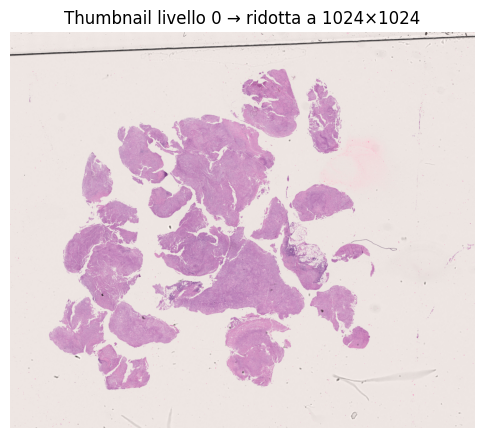

In [6]:
# Crea una miniatura con lato massimo 1024px
thumb = slide_b.get_thumbnail((1024, 1024))
plt.figure(figsize=(6,6))
plt.imshow(thumb)
plt.axis('off')
plt.title('Thumbnail livello 0 → ridotta a 1024×1024')
plt.show()


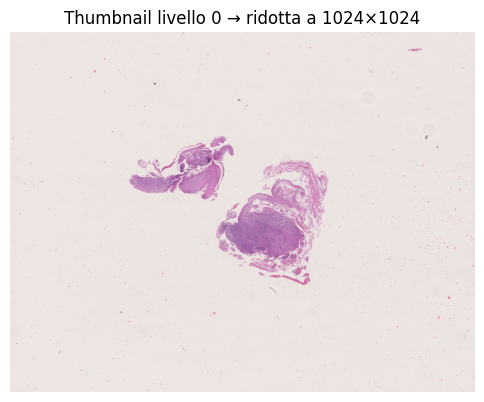

In [7]:
# Crea una miniatura con lato massimo 1024px
thumb = slide_e.get_thumbnail((1024, 1024))
plt.figure(figsize=(6,6))
plt.imshow(thumb)
plt.axis('off')
plt.title('Thumbnail livello 0 → ridotta a 1024×1024')
plt.show()


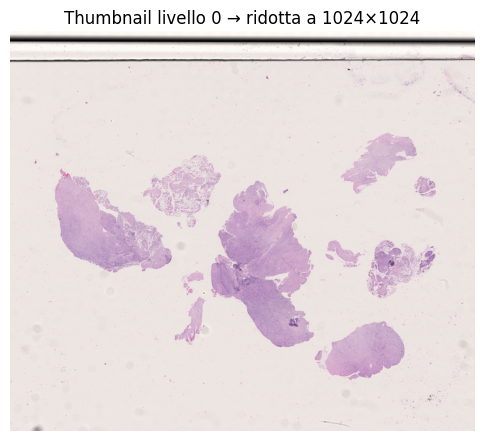

In [8]:

# Crea una miniatura con lato massimo 1024px
thumb = slide_s.get_thumbnail((1024, 1024))
plt.figure(figsize=(6,6))
plt.imshow(thumb)
plt.axis('off')
plt.title('Thumbnail livello 0 → ridotta a 1024×1024')
plt.show()


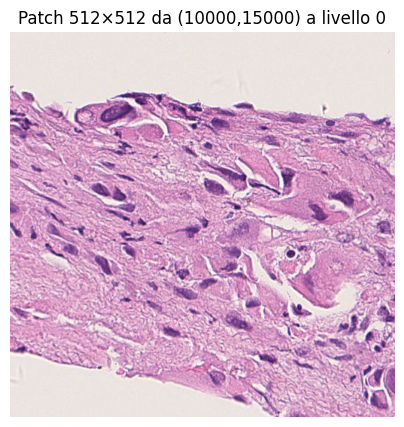

In [13]:
# Lettura di una regione a livello 0 (intera risoluzione)
# Coordinate (x, y) in pixel su livello 0, dimensione patch 512×512
region = slide_b.read_region((20000, 15000), level=0, size=(512, 512))
region = region.convert('RGB')  # rimuove canale alfa

plt.figure(figsize=(5,5))
plt.imshow(region)
plt.axis('off')
plt.title('Patch 512×512 da (10000,15000) a livello 0')
plt.show()


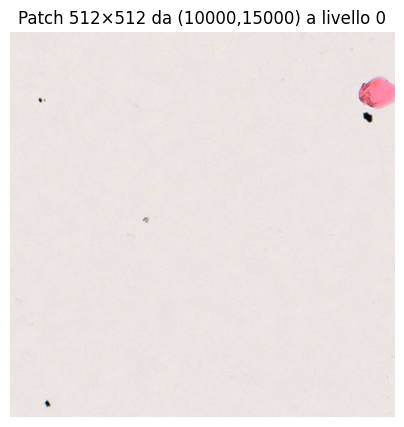

In [10]:
# Lettura di una regione a livello 0 (intera risoluzione)
# Coordinate (x, y) in pixel su livello 0, dimensione patch 512×512
region = slide_e.read_region((10000, 15000), level=0, size=(512, 512))
region = region.convert('RGB')  # rimuove canale alfa

plt.figure(figsize=(5,5))
plt.imshow(region)
plt.axis('off')
plt.title('Patch 512×512 da (10000,15000) a livello 0')
plt.show()


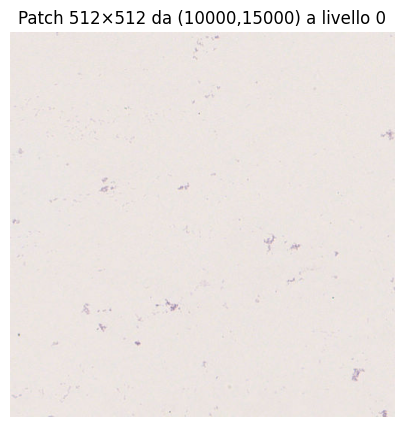

In [12]:
# Lettura di una regione a livello 0 (intera risoluzione)
# Coordinate (x, y) in pixel su livello 0, dimensione patch 512×512
region = slide_s.read_region((20000, 15000), level=0, size=(512, 512))
region = region.convert('RGB')  # rimuove canale alfa

plt.figure(figsize=(5,5))
plt.imshow(region)
plt.axis('off')
plt.title('Patch 512×512 da (10000,15000) a livello 0')
plt.show()
